In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:3]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0


### quest_2
    - '신장', '체중' 이용해서 BMI
    - BMI 시각화 및 인사이트
    - BMI : 체중 / 신장^2
    -  기준: 이것은 너무 범위가 넒음. 
            - BMI < 18.5: 저체중 (Underweight)
            - 18.5 <= BMI < 24.9: 정상체중 (Normal weight)
            - 25 <= BMI < 29.9: 과체중 (Overweight)
            - 30 <= BMI < 34.9: 1단계 비만 (Obese class 1)
            - 35 <= BMI < 39.9: 2단계 비만 (Obese class 2)
            - BMI >= 40: 고도 비만 (Obese class 3)
    - 기준 변경 : 대한비만학회
            - 23 <= BMI < 25: 과체중 (Overweight)
            - 25 <= BMI < 30: 1단계 비만 (Obese class 1)
            - 30 <= BMI < 35: 2단계 비만 (Obese class 2)
            - BMI >= 35: 고도 비만 (Obese class 3)

In [3]:
df_ROS.info()
#'신장' int, '체중' float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [4]:
df_ROS_WH=df_ROS[['신장', '체중', '환자ID']]

In [5]:
df_ROS_WH['신장']

0       163
1       171
2       178
3       174
4       183
       ... 
1889    157
1890    157
1891    167
1892    177
1893    168
Name: 신장, Length: 1894, dtype: int64

In [6]:
df_ROS_WH['체중']

0       60.3
1       71.7
2       77.1
3       74.2
4       80.7
        ... 
1889    64.0
1890    59.0
1891    70.0
1892    77.0
1893    49.0
Name: 체중, Length: 1894, dtype: float64

In [7]:
def convert(height) : 
    return float(height)

In [8]:
df_ROS_WH['신장_소수']=df_ROS_WH['신장'].apply(convert)
df_ROS_WH[:2]

C:\Users\01-15\AppData\Local\Temp\ipykernel_1204\182664247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_WH['신장_소수']=df_ROS_WH['신장'].apply(convert)


,신장,체중,환자ID,신장_소수
0,163,60.3,1PT,163.0
1,171,71.7,2PT,171.0


In [9]:
def cm_convert(height):
    height = height / 100
    return height

In [10]:
df_ROS_WH['신장(m)']= df_ROS_WH['신장_소수'].apply(cm_convert)

C:\Users\01-15\AppData\Local\Temp\ipykernel_1204\160763788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_WH['신장(m)']= df_ROS_WH['신장_소수'].apply(cm_convert)


In [11]:
df_ROS_WH['신장(m)^2'] = df_ROS_WH['신장(m)'] * df_ROS_WH['신장(m)']
df_ROS_WH['신장(m)^2']

C:\Users\01-15\AppData\Local\Temp\ipykernel_1204\1394123999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_WH['신장(m)^2'] = df_ROS_WH['신장(m)'] * df_ROS_WH['신장(m)']


0       2.6569
1       2.9241
2       3.1684
3       3.0276
4       3.3489
         ...  
1889    2.4649
1890    2.4649
1891    2.7889
1892    3.1329
1893    2.8224
Name: 신장(m)^2, Length: 1894, dtype: float64

In [12]:
df_ROS_WH['BMI'] = df_ROS_WH['체중'] / df_ROS_WH['신장(m)^2']

C:\Users\01-15\AppData\Local\Temp\ipykernel_1204\1904393504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_WH['BMI'] = df_ROS_WH['체중'] / df_ROS_WH['신장(m)^2']


In [27]:
## 조건을 걸고 싶어서 chat에 물어봄. 
def BMI_calculation(BMI):
    if (BMI) < 18.5 :
        return '저체중'
    elif 18.5 <= (BMI) < 23 :
        return '정상체중'
    elif 23 <= (BMI) < 25 :
        return '과체중'
    elif 25 <= (BMI) < 30 :
        return '1단계비만'
    elif 30 <= (BMI) <35 : 
        return '2단계비만'
    elif 35 <= (BMI) : 
        return '고도비만'
    else :
        return '측정이상'

In [21]:
df_ROS_WH['BMI_범위'] = df_ROS_WH['BMI'].apply(BMI_calculation)

C:\Users\01-15\AppData\Local\Temp\ipykernel_1204\814384599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_WH['BMI_범위'] = df_ROS_WH['BMI'].apply(BMI_calculation)


In [22]:
df_ROS_WH

,신장,체중,환자ID,신장_소수,신장(m),신장(m)^2,BMI,BMI_범위
0,163,60.3,1PT,163.0,1.63,2.6569,22.695623,정상체중
1,171,71.7,2PT,171.0,1.71,2.9241,24.520365,과체중
2,178,77.1,3PT,178.0,1.78,3.1684,24.334049,과체중
3,174,74.2,4PT,174.0,1.74,3.0276,24.507861,과체중
4,183,80.7,5PT,183.0,1.83,3.3489,24.097465,과체중
...,...,...,...,...,...,...,...,...
1889,157,64.0,1890PT,157.0,1.57,2.4649,25.964542,1단계비만
1890,157,59.0,1891PT,157.0,1.57,2.4649,23.936062,과체중
1891,167,70.0,1892PT,167.0,1.67,2.7889,25.099502,1단계비만
1892,177,77.0,1893PT,177.0,1.77,3.1329,24.577867,과체중


In [23]:
df_BMI_pivot=pd.pivot_table(data=df_ROS_WH, index='BMI_범위', aggfunc=len)
df_BMI_pivot

,BMI,신장,신장(m),신장(m)^2,신장_소수,체중,환자ID
BMI_범위,,,,,,,
1단계비만,403,403,403,403,403,403,403
2단계비만,58,58,58,58,58,58,58
고도비만,5,5,5,5,5,5,5
과체중,821,821,821,821,821,821,821
저체중,38,38,38,38,38,38,38
정상체중,569,569,569,569,569,569,569


In [24]:
df_BMI_pivot['BMI_범위'] = df_BMI_pivot.index

In [25]:
df_BMI_pivot[:2]

,BMI,신장,신장(m),신장(m)^2,신장_소수,체중,환자ID,BMI_범위
BMI_범위,,,,,,,,
1단계비만,403,403,403,403,403,403,403,1단계비만
2단계비만,58,58,58,58,58,58,58,2단계비만


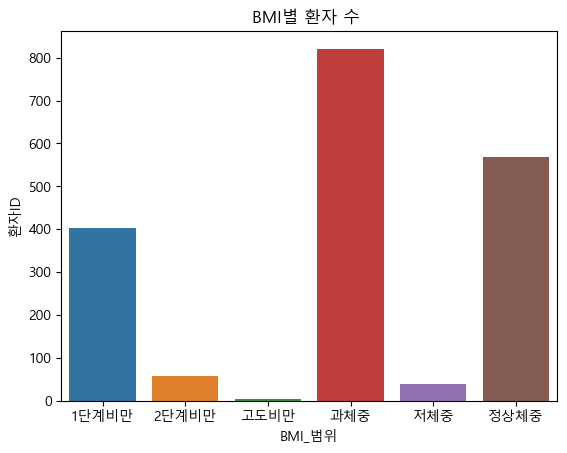

In [26]:
sns.barplot(data=df_BMI_pivot, x='BMI_범위', y='환자ID')
plt.title('BMI별 환자 수 ')
plt.show()

#### 결과
    - 디스크 환자의 체중은 1순위가 과제충, 2순위가 정상체중, 3순위가 1단계 비만 으로 보여짐. 
    - BMI와 디스크 환자의 연관성이 있을 것이라 생각했음. 
        ⇒ 이 데이터로 알 수 있는것. 
            1_ 일반적으로 환자들 사이에 과체중이 많음 
            2_ 고도비만이 상대적으로 적은 수 임. 아마 디스크의 심한 정도나 재발 여부는 여기가 높지 않을까.. 
            3_ 과체중, 정상체중, 1단계비만 높은 이유는 직업이나 생활 행동 습관에서 나타나지 않을까 생각됨. 
                -> 이들의 직업 및 평소 습관이 궁금함. 